## PermuteCoordinatesInverseView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@4248b215

This `Op` wraps the `Views.permuteCoordinatesInverse()` method of ImgLib2, performing a [bijective permutation](https://en.wikipedia.org/wiki/Bijection) on the coordinates of any `RandomAccessibleInterval`. This `Op` is the inverse of [`permuteCoordinatesView`](permuteCoordinatesView.ipynb), meaning that it can undo the permutation caused by `permuteCoordinatesView`. Let's see how this `Op` is called:

In [2]:
ij.op().help('permuteCoordinatesInverseView')

Available operations:
	(IntervalView out) =
	net.imagej.ops.transform.permuteCoordinatesInverseView.DefaultPermuteCoordinatesInverseView(
		RandomAccessibleInterval in,
		int[] permutation)
	(IntervalView out) =
	net.imagej.ops.transform.permuteCoordinatesInverseView.PermuteCoordinateInverseViewOfDimension(
		RandomAccessibleInterval in,
		int[] permutation,
		int d)

Let's look at the parameters of the `Op`:

* `RandomAccessibleInterval in`: the input image
* `int[] permutation`: an array defining a mapping of coordinates. The mapping is defined as follows: if `i` is any given column/row in an image, then `i` is mapped to `permutation[i]`. So if we have an `Img` of size `[5, 5]` and `permutation = [4, 3, 2, 1, 0]`, then column and row 0 are mapped to 4, column and row 1 are mapped to 3, and so on. However if `permutation = [1, 1, 1, 1, 1]` (which is in fact allowed by `permuteCoordinatesView`, then column and row 0 are mapped to 1, then  column and row 1 are mapped to 1, then column and row 2 are mapped to 1, and so on, matching all of the columns to the 2nd column in the `in`. This is not particularly useful, but it is something to be noted. Note that the array **must** be **equal in size** to the dimensions that are to be permuted, as determined by the value (or absence) of `d`.
* `int d`: an **optional** parameter telling the `Op` which dimension to perform the permutation in. If parameter is not passed through then the `Op` will attempt to permute all of the dimensions.

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


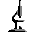

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/ij-icon.gif")

ij.notebook().display(input)

Let's say we have a [permuted](permuteCoordinatesView.ipynb) image that we did some work on:

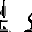

In [4]:
permutation = [ 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 8] as int[]

permuted = ij.op().run("permuteCoordinatesView", input, permutation, 0)

ij.notebook().display(permuted)

Now that we have done our work on the image we want to revert the columns back to normal. Instead of using `permuteCoordinatesView` again, which would cause us to have to create another `permutation` array, we can just pass the same array to `permuteCoordinatesInverseView` to revert the image:

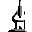

In [5]:
permutedBack = ij.op().run("permuteCoordinatesInverseView", permuted, permutation, 0)

ij.notebook().display(permutedBack)